In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [4]:
click_data = pd.read_csv("../data/click_data.csv")
emotional_events = pd.read_csv("../data/emotional_events.csv")
messages_data = pd.read_csv("../data/messages_data.csv")
user_information = pd.read_csv("../data/user_information.csv")
new_features = pd.read_csv("../feature_Engineering/new_features.csv")

In [35]:
#This columns are required in the new_feature File

#userId,task,number_interactions_with_assistant,spent_time_with_assistant (seconds),number_interactions_with_tables,spent_time_with_tables (seconds),confidence,arousal,valence,understanding,task_time (seconds)

### From message_data we are able to extract the number of interactions with the assistand and how long an user takes at a task

In [36]:
messages_data.sort_values(by=["userId", "task", "timestamp_unix"], inplace=True)
messages_data.reset_index(drop=True, inplace=True)

messages_data["number_interactions_with_assistant"] = 0
messages_data["spent_time_with_assistant (seconds)"] = 0

for (userId, task), group in messages_data.groupby(['userId', 'task']):
    number_interactions = group.shape[0]
    
    first_interaction_time = group['timestamp_unix'].min()
    last_interaction_time = group['timestamp_unix'].max()
    
    total_time_spent = last_interaction_time - first_interaction_time
    
    messages_data.loc[group.index, 'number_interactions_with_assistant'] = number_interactions
    messages_data.loc[group.index, 'spent_time_with_assistant (seconds)'] = total_time_spent

    with open('../feature_Engineering/new_features.csv', 'a') as file:
        file.write(f"{userId},{task},{number_interactions},{total_time_spent}\n")


### Exploring click_data, able to extract interactions at a task

In [37]:
click_data.sort_values(by=["userId", "task"], inplace=True)
click_data.reset_index(drop=True, inplace=True)

click_data["number_interactions_with_tables"] = 0
click_data["spent_time_with_tables (seconds)"] = 0

for (userId, task), group in click_data.groupby(['userId', 'task']):
    number_interactions = group.shape[0]
    
    first_interaction_time = group['timestamp_unix'].min()
    last_interaction_time = group['timestamp_unix'].max()
    
    total_time_spent = last_interaction_time - first_interaction_time
    
    click_data.loc[group.index, 'number_interactions_with_tables'] = number_interactions
    click_data.loc[group.index, 'spent_time_with_tables (seconds)'] = total_time_spent
    
    rows = []
    csv_filename = '../feature_Engineering/new_features.csv'
    # Read existing data from the new_features file
    with open(csv_filename, 'r') as file:
        reader = csv.DictReader(file)
        rows = list(reader)

    # Check if the row exists and update it
    row_exists = False
    for row_user_information in rows:
        user_feature = int(row_user_information['userId'])
        task_feature = int(row_user_information['task'])
        userID = int(userId)
        task = int(task)
        if user_feature == userId and task_feature == task:
            row_user_information['number_interactions_with_tables'] = number_interactions
            row_user_information['spent_time_with_tables (seconds)'] = total_time_spent
            row_exists = True
            break

    # If the row doesn't exist, append a new row
    if not row_exists:
        new_row = {
            'userId': userId,
            'task': task,
            'number_interactions_with_assistant': 0,
            'spent_time_with_assistant (seconds)': 0,
            'number_interactions_with_tables': number_interactions,
            'spent_time_with_tables (seconds)': total_time_spent
        }
        rows.append(new_row)

    # Write the updated data back to the CSV file after each iteration
    with open(csv_filename, 'w', newline='') as file:
        fieldnames = ['userId', 'task', 'number_interactions_with_assistant', 'spent_time_with_assistant (seconds)',
                        'number_interactions_with_tables', 'spent_time_with_tables (seconds)', 'confidence', 'arousal', 'valence', 'understanding', 'task_time (seconds)']
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)

### Exploring emotional_events, able to extract time per task, confidence, understanding, arousal and valence

In [ ]:
# Filter the DataFrame to keep only the rows where 'task_type' is 'Information_finding'
filtered_df_information_finding = emotional_events[emotional_events['task_type'] == 'information_finding']
filtered_df_information_finding['arousal'].replace('AO07', '7', inplace=True)
filtered_df_information_finding['valence'].replace('AO07', '7', inplace=True)

for index, row_user_information in filtered_df_information_finding.iterrows():
    if row_user_information[['confidence', 'arousal', 'understanding', 'valence']].notnull().all():
        userId = row_user_information['userId']
        task = row_user_information['task']
        confidence = int(row_user_information['confidence'])
        arousal = int(row_user_information['arousal'])
        understanding = int(row_user_information['understanding'])
        valence = int(row_user_information['valence'])
        task_time = int(row_user_information['task_time'] )
        
        rows = []
        csv_filename = '../feature_Engineering/new_features.csv'
        # Read existing data from the new_features file
        with open(csv_filename, 'r') as file:
            reader = csv.DictReader(file)
            rows = list(reader)

        # Check if the row exists and update it
        row_exists = False
        for row_user_information in rows:
            user_feature = int(row_user_information['userId'])
            task_feature = int(row_user_information['task'])
            if user_feature == userId and task_feature == task:
                row_user_information['confidence'] = confidence
                row_user_information['arousal'] = arousal
                row_user_information['valence'] = valence
                row_user_information['understanding'] = understanding
                row_user_information['task_time (seconds)'] = task_time
                row_exists = True
                break

        # If the row doesn't exist, append a new row
        if not row_exists:
            new_row = {
                'userId': userId,
                'task': task,
                'number_interactions_with_assistant': 0,
                'spent_time_with_assistant (seconds)': 0,
                'number_interactions_with_tables': 0,
                'spent_time_with_tables (seconds)': 0,
                'confidence': confidence,
                'arousal': arousal,
                'valence': valence,
                'understanding': understanding,
                'task_time (seconds)': task_time
            }
            rows.append(new_row)

        # Write the updated data back to the CSV file after each iteration
        with open(csv_filename, 'w', newline='') as file:
            fieldnames = ['userId', 'task', 'number_interactions_with_assistant', 'spent_time_with_assistant (seconds)',
                        'number_interactions_with_tables', 'spent_time_with_tables (seconds)', 'confidence', 'arousal', 'valence', 'understanding', 'task_time (seconds)']
            writer = csv.DictWriter(file, fieldnames=fieldnames)
            writer.writeheader()
            writer.writerows(rows)


### Extracting Information from user_information

In [5]:
# Merge DataFrames based on 'id' and 'userId'
merged_df = new_features.merge(
    user_information[['id', 'age', 'education', 'assistant_usage', 'experience_analysis_tools']],
    left_on='userId',
    right_on='id',
    how='left'
)

merged_df.drop(columns=['id'], inplace=True)

merged_df.to_csv("../feature_Engineering/new_features.csv", index=False)

### Creating Target Variable

In [5]:
# Create the 'stress_level' column based on the conditions
# ADJUST IF NEEDED
new_features['stress_level'] = ((new_features['valence'] < 4) & (new_features['arousal'] > 3)).astype(int)

# Save the result (overwrite the existing file)
new_features.to_csv("../feature_Engineering/new_features.csv", index=False)

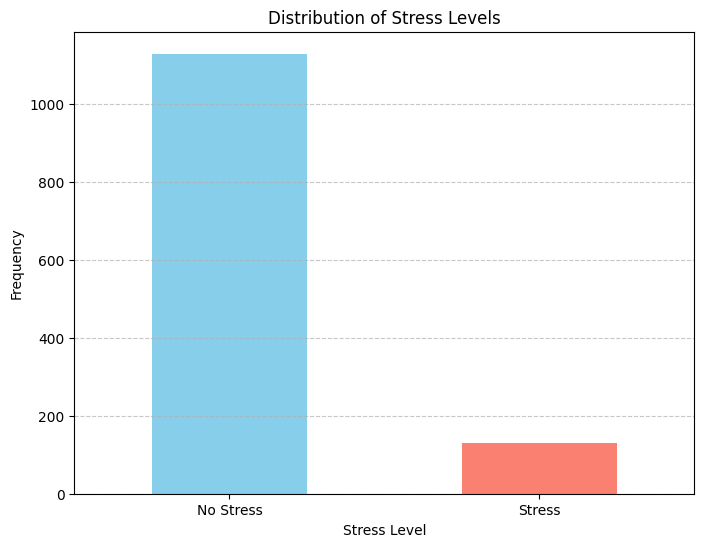

In [8]:
plt.figure(figsize=(8, 6))
new_features['stress_level'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['No Stress', 'Stress'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Dont forget to remove Arousal and Valence columns from DF